<a href="https://colab.research.google.com/github/binodmathews93/GUVI-DeepLearning/blob/main/PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())


Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
5


## Visualise data

In [6]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


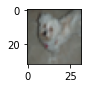

In [9]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

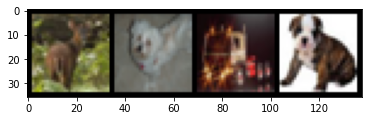

deer dog truck dog


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [12]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [15]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


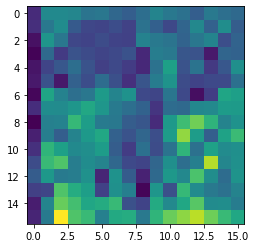

In [17]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [18]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [19]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

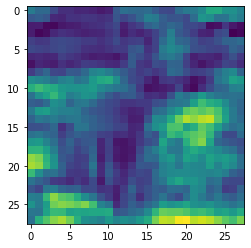

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [21]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [22]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

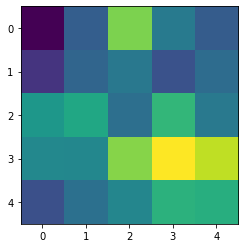

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [24]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [25]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [26]:
print(out)

tensor([[ 0.0105, -0.0116,  0.1408, -0.0843, -0.0925,  0.0633, -0.0601, -0.0282,
         -0.0907,  0.1032],
        [ 0.0054, -0.0213,  0.1341, -0.0994, -0.0855,  0.0681, -0.0804, -0.0352,
         -0.0877,  0.1016],
        [ 0.0211, -0.0161,  0.1404, -0.0824, -0.0828,  0.0643, -0.0620, -0.0240,
         -0.1026,  0.0934],
        [ 0.0027, -0.0327,  0.1401, -0.0775, -0.1048,  0.0501, -0.0910, -0.0499,
         -0.0818,  0.0920]], grad_fn=<AddmmBackward>)


In [27]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([2, 2, 2, 2])


## Training LeNet

In [28]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [29]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [31]:
net = LeNet()

In [32]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.13, Train acc: 38.42
Epoch: 1/16, Test acc: 43.12, Train acc: 43.39
Epoch: 2/16, Test acc: 47.54, Train acc: 47.73
Epoch: 3/16, Test acc: 49.70, Train acc: 50.18
Epoch: 4/16, Test acc: 50.98, Train acc: 52.61
Epoch: 5/16, Test acc: 52.16, Train acc: 54.31
Epoch: 6/16, Test acc: 53.20, Train acc: 55.74
Epoch: 7/16, Test acc: 52.63, Train acc: 56.13
Epoch: 8/16, Test acc: 53.35, Train acc: 57.33
Epoch: 9/16, Test acc: 54.09, Train acc: 59.00
Epoch: 10/16, Test acc: 54.87, Train acc: 60.19
Epoch: 11/16, Test acc: 55.13, Train acc: 61.37
Epoch: 12/16, Test acc: 55.16, Train acc: 61.97
Epoch: 13/16, Test acc: 54.77, Train acc: 62.11
Epoch: 14/16, Test acc: 55.65, Train acc: 63.94
Epoch: 15/16, Test acc: 56.04, Train acc: 65.05


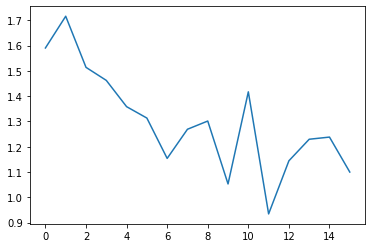

CPU times: user 6min 23s, sys: 3.45 s, total: 6min 26s
Wall time: 6min 25s


In [33]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [36]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [37]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 20s, sys: 604 ms, total: 1min 21s
Wall time: 1min 21s


In [38]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.62, Train acc: 65.15


## Basic Visualisation

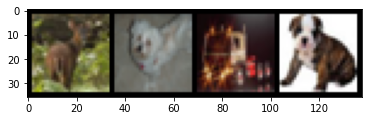

In [39]:
imshow(torchvision.utils.make_grid(images))

In [40]:
net = net.to('cpu')

In [41]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [42]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

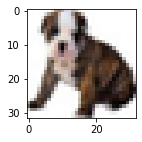

In [43]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


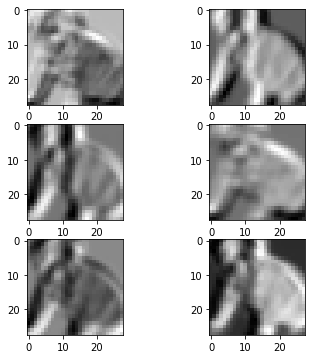

In [44]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Using ReLU instead of Tanh

In [45]:
class LeNet_v2(nn.Module):
    def __init__(self): 
        super(LeNet_v2, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [46]:
def evaluation_v2(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net_v2(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [47]:
net_v2 = LeNet_v2().to(device)
opt = optim.Adam(net_v2.parameters(), weight_decay=0.01)

Epoch: 0/16, Test acc: 31.17, Train acc: 30.53
Epoch: 1/16, Test acc: 37.96, Train acc: 37.42
Epoch: 2/16, Test acc: 37.75, Train acc: 36.85
Epoch: 3/16, Test acc: 39.79, Train acc: 39.38
Epoch: 4/16, Test acc: 41.13, Train acc: 41.11
Epoch: 5/16, Test acc: 43.07, Train acc: 42.86
Epoch: 6/16, Test acc: 42.69, Train acc: 42.76
Epoch: 7/16, Test acc: 44.65, Train acc: 44.31
Epoch: 8/16, Test acc: 46.10, Train acc: 46.18
Epoch: 9/16, Test acc: 45.74, Train acc: 46.04
Epoch: 10/16, Test acc: 46.39, Train acc: 45.80
Epoch: 11/16, Test acc: 47.10, Train acc: 46.92
Epoch: 12/16, Test acc: 47.08, Train acc: 47.38
Epoch: 13/16, Test acc: 48.37, Train acc: 48.70
Epoch: 14/16, Test acc: 47.94, Train acc: 47.88
Epoch: 15/16, Test acc: 47.81, Train acc: 48.00


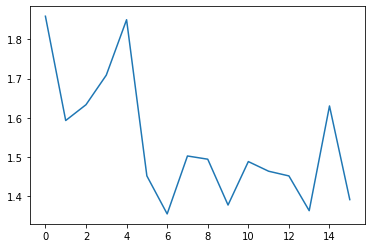

CPU times: user 2min 49s, sys: 2.18 s, total: 2min 51s
Wall time: 2min 51s


In [48]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net_v2(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation_v2(testloader), evaluation_v2(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

##Using MNIST Dataset

In [57]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [58]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([128, 1, 28, 28])
torch.Size([1, 28, 28])
4


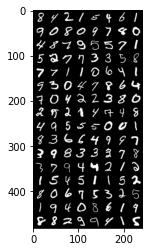

tensor([8, 4, 2, 1, 5, 4, 6, 1, 9, 0, 8, 0, 9, 7, 8, 0, 4, 8, 7, 9, 5, 5, 7, 1,
        5, 2, 7, 7, 3, 3, 5, 8, 7, 7, 1, 1, 0, 6, 4, 1, 9, 3, 0, 4, 7, 8, 6, 4,
        7, 0, 4, 2, 2, 3, 8, 0, 2, 5, 2, 1, 4, 7, 4, 8, 4, 9, 5, 5, 5, 0, 0, 1,
        8, 3, 6, 6, 4, 9, 9, 7, 3, 9, 8, 3, 3, 3, 7, 8, 3, 7, 9, 4, 4, 2, 1, 2,
        1, 5, 4, 5, 1, 1, 5, 2, 8, 0, 6, 7, 5, 3, 2, 5, 1, 9, 4, 0, 8, 6, 1, 9,
        8, 8, 2, 9, 9, 4, 1, 5])


In [59]:
imshow(torchvision.utils.make_grid(images))
#print(' '.join(classes[labels[j]] for j in range(4)))
print(labels)

In [53]:
class LeNet_v3(nn.Module):
    def __init__(self): 
        super(LeNet_v3, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5),         # (N, 1, 28, 28) -> (N,  6, 24, 24)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 24, 24) -> (N,  6, 12, 12)
            nn.Conv2d(6, 16, 5),        # (N, 6, 12, 12) -> (N, 16, 8, 8)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 8, 8) -> (N, 16, 4, 4)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(256,120),         # (N, 256) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [54]:
def evaluation_v3(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net_v3(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [55]:
net_v3 = LeNet_v3().to(device)
opt = optim.Adam(net_v3.parameters(), weight_decay=0.01)

Epoch: 0/16, Test acc: 91.91, Train acc: 91.59
Epoch: 1/16, Test acc: 95.23, Train acc: 94.80
Epoch: 2/16, Test acc: 95.71, Train acc: 95.45
Epoch: 3/16, Test acc: 95.81, Train acc: 95.45
Epoch: 4/16, Test acc: 96.63, Train acc: 96.68
Epoch: 5/16, Test acc: 96.37, Train acc: 96.14
Epoch: 6/16, Test acc: 97.05, Train acc: 96.66
Epoch: 7/16, Test acc: 97.10, Train acc: 96.77
Epoch: 8/16, Test acc: 96.89, Train acc: 96.47
Epoch: 9/16, Test acc: 96.72, Train acc: 96.58
Epoch: 10/16, Test acc: 96.94, Train acc: 96.64
Epoch: 11/16, Test acc: 96.96, Train acc: 96.67
Epoch: 12/16, Test acc: 97.13, Train acc: 96.94
Epoch: 13/16, Test acc: 97.34, Train acc: 96.99
Epoch: 14/16, Test acc: 96.72, Train acc: 96.43
Epoch: 15/16, Test acc: 96.59, Train acc: 96.43


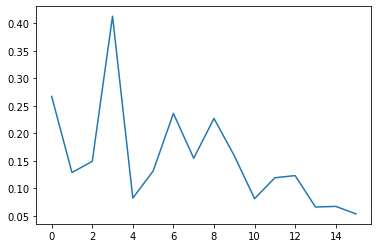

CPU times: user 2min 26s, sys: 1.2 s, total: 2min 27s
Wall time: 2min 27s


In [60]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net_v3(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation_v3(testloader), evaluation_v3(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()